In [1]:
import pandas as pd
import pandas as pd
import numpy as np
# 기존 plotnine(ggplot)코드를 pandas와 seaborn으로 변경
# from plotnine import *
import seaborn as sns
# 지도 시각화를 위해
import folium

import warnings
warnings.filterwarnings('ignore')
# warning 메시지 제거, warning 메시지는 라이브러리 업데이트나 사용법에 대한 안내 등이 있습니다.
# 코딩을 처음 시작할 때는  warning 메시지가 나오면 당황하실 수도 있어서 제거를 하고 보도록 합니다.
# warning 메시지는 제거하고 보셔도 되지만 Error 메시지를 꼭 고쳐주셔야 합니다.
warnings.filterwarnings('ignore', 'This pattern has match groups')
warnings.filterwarnings('ignore', 'The iterable function was deprecated in Matplotlib')

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic') 
plt.rc('axes', unicode_minus=False)

set_matplotlib_formats('retina')

import json
import mpld3

In [31]:
df=pd.read_csv(r'D:\사용자\USER\Desktop\데이터\서울총인구.csv', encoding='cp949', thousands=',')
df.head()

,행정구역,인구수
0,서울특별시 (1100000000),9550227
1,서울특별시 종로구 (1111000000),145551
2,서울특별시 종로구 청운효자동(1111051500),12014
3,서울특별시 종로구 사직동(1111053000),9360
4,서울특별시 종로구 삼청동(1111054000),2475


In [32]:
gannam=df[df["행정구역"].notnull() & df["행정구역"].str.contains("강남구")]
gannam

,행정구역,인구수
381,서울특별시 강남구 (1168000000),532818
382,서울특별시 강남구 신사동(1168051000),16076
383,서울특별시 강남구 논현1동(1168052100),22457
384,서울특별시 강남구 논현2동(1168053100),21290
385,서울특별시 강남구 압구정동(1168054500),26461
386,서울특별시 강남구 청담동(1168056500),26257
387,서울특별시 강남구 삼성1동(1168058000),13045
388,서울특별시 강남구 삼성2동(1168059000),29460
389,서울특별시 강남구 대치1동(1168060000),24286
390,서울특별시 강남구 대치2동(1168061000),36245


In [33]:
gannam.columns[:2]
gannam=gannam.loc[2:,['행정구역','인구수']]
gannam=gannam.drop(gannam.index[0])
#print(gannam.replace('(.*)서울특별시 강남구 (.*)', r'\1\2', regex=True))
gannam['행정구역'] = gannam['행정구역'].str.replace('서울특별시 강남구', '')
gannam


#gannam['start']=gannam['행정구역'].str.find(sub='(')
#gannam['end']=gannam['행정구역'].str.find(sub=')')
#gannam['행정구역']= gannam['행정구역'].str.slice_replace(start=gannam['start'],stop=gannam['end']+1,repl='?')
               

,행정구역,인구수
382,신사동(1168051000),16076
383,논현1동(1168052100),22457
384,논현2동(1168053100),21290
385,압구정동(1168054500),26461
386,청담동(1168056500),26257
387,삼성1동(1168058000),13045
388,삼성2동(1168059000),29460
389,대치1동(1168060000),24286
390,대치2동(1168061000),36245
391,대치4동(1168063000),20067


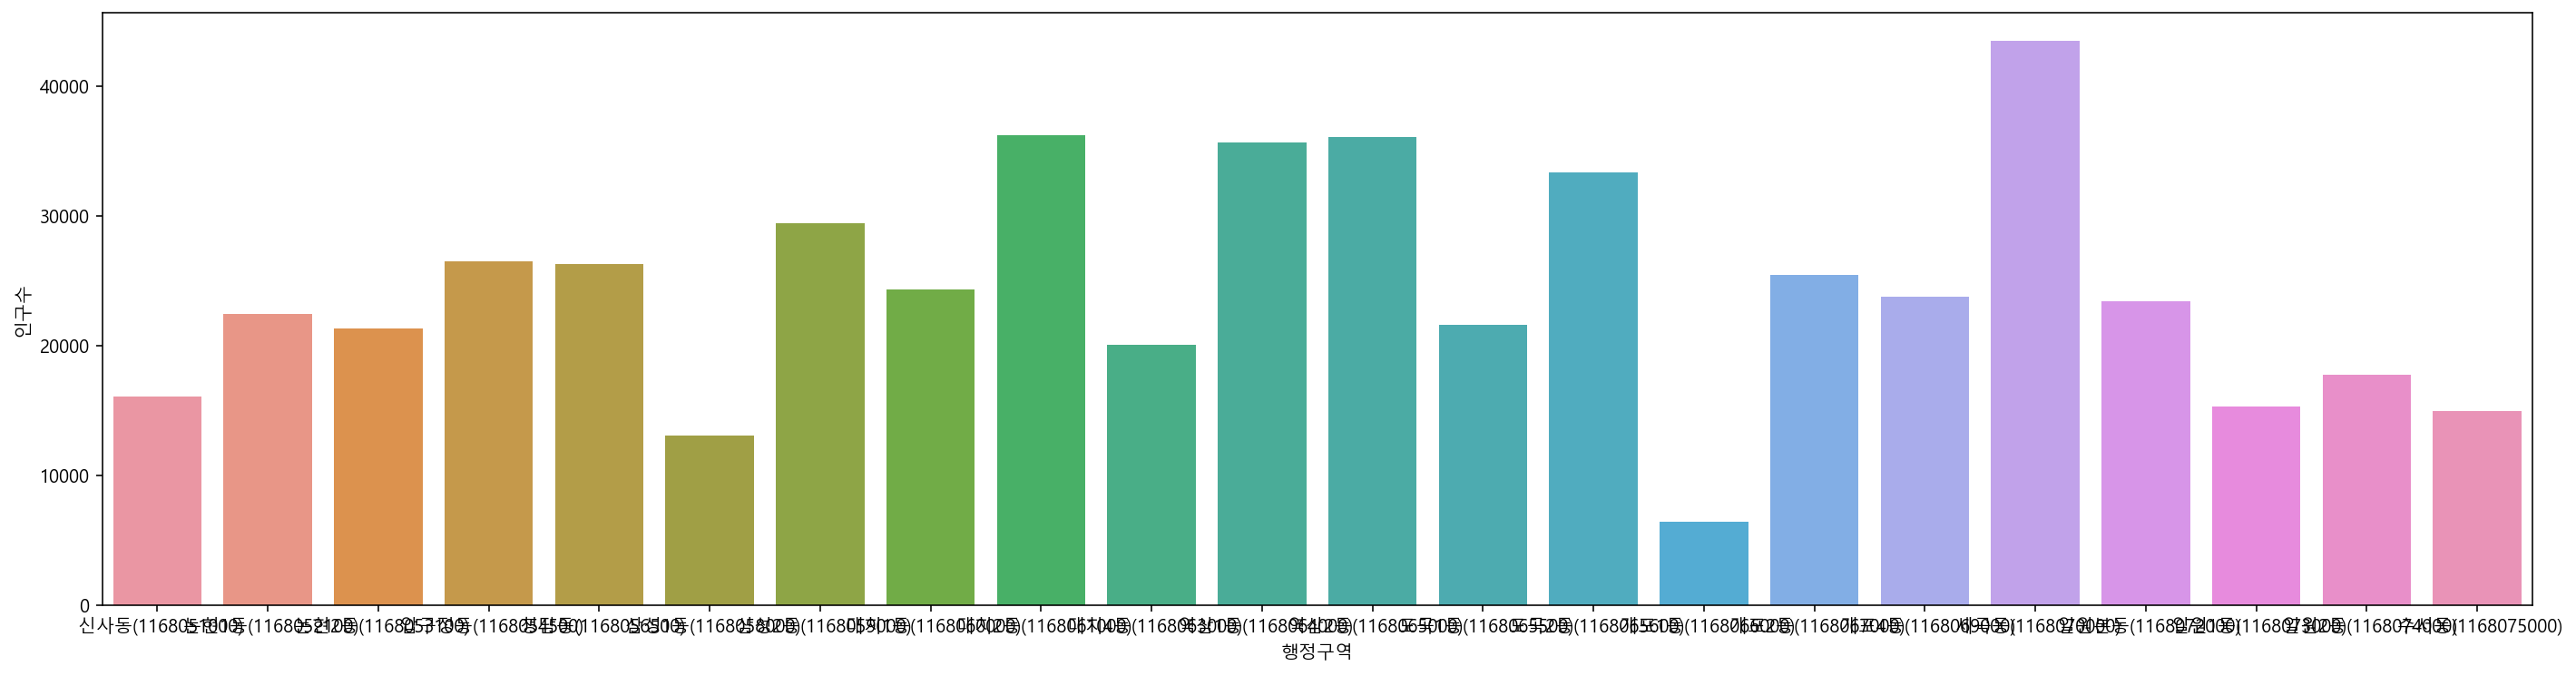

In [34]:
gannam['인구수']=pd.to_numeric(gannam['인구수'])


plt.figure(figsize=(24, 6))
sns.barplot(data=gannam, x='행정구역', y='인구수')

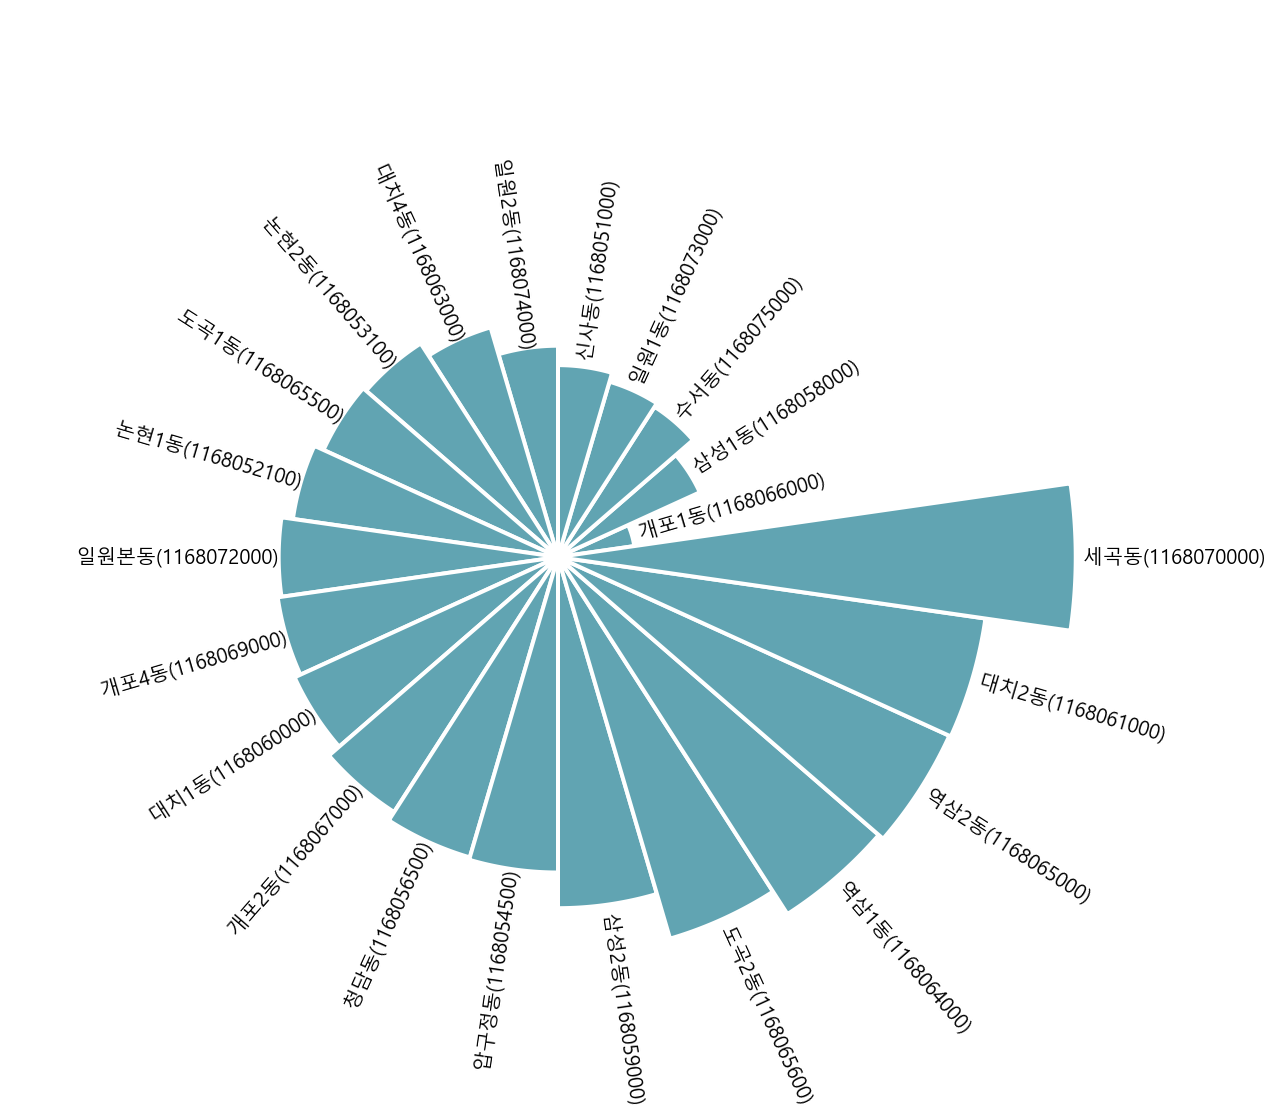

In [35]:
df = pd.DataFrame(
        {
            'Name': gannam['행정구역'],
            'Value': gannam['인구수']
        })

# Reorder the dataframe
df = df.sort_values(by=['Value'])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

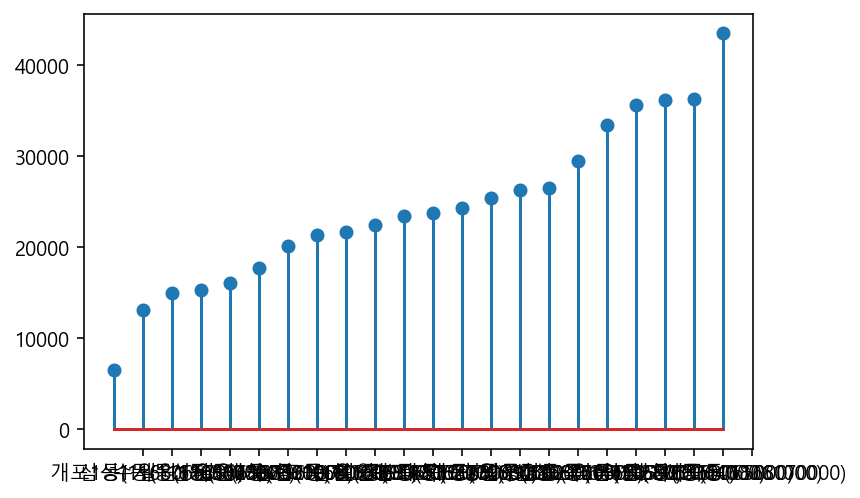

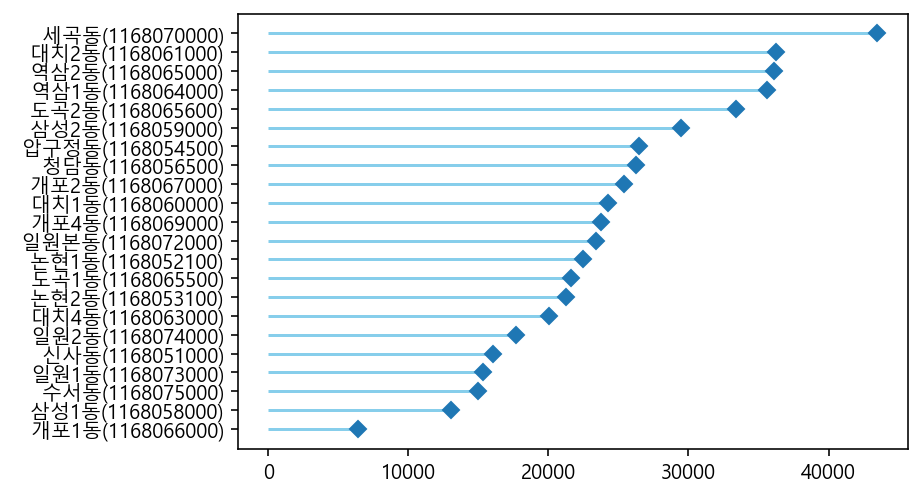

In [36]:
df = pd.DataFrame({'group':gannam['행정구역'], 'values':gannam['인구수'] })
 
# Reorder it based on the values:
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)
 
# Make the plot
plt.stem(ordered_df['values'])
plt.xticks( my_range, ordered_df['group'])
plt.show()
 
# Horizontal version
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='skyblue')
plt.plot(ordered_df['values'], my_range, "D")
plt.yticks(my_range, ordered_df['group'])
plt.show()


In [37]:
shop = pd.read_csv(r'D:\사용자\USER\Desktop\데이터\서울상가.csv', encoding='cp949')


In [38]:
mac = shop[shop["상호명"].notnull() &shop['상호명'].str.contains('맥도날드')].copy()

In [39]:
mac.loc[mac['상호명'].str.contains('맥도날드'), '브랜드명'] = '맥도날드'

In [40]:
df_mac = pd.DataFrame(
    mac.groupby(['시군구명', '브랜드명'])['상호명'].count()
).reset_index()
df_mac.columns = ['구', '브랜드명', '매장수']
df_mac = df_mac.sort_values(by='매장수',ascending=False)
df_mac = df_mac.reset_index(drop=True)
df_mac

,구,브랜드명,매장수
0,강남구,맥도날드,11
1,서초구,맥도날드,8
2,종로구,맥도날드,6
3,금천구,맥도날드,6
4,양천구,맥도날드,6
5,송파구,맥도날드,6
6,강동구,맥도날드,5
7,강서구,맥도날드,5
8,구로구,맥도날드,5
9,노원구,맥도날드,5


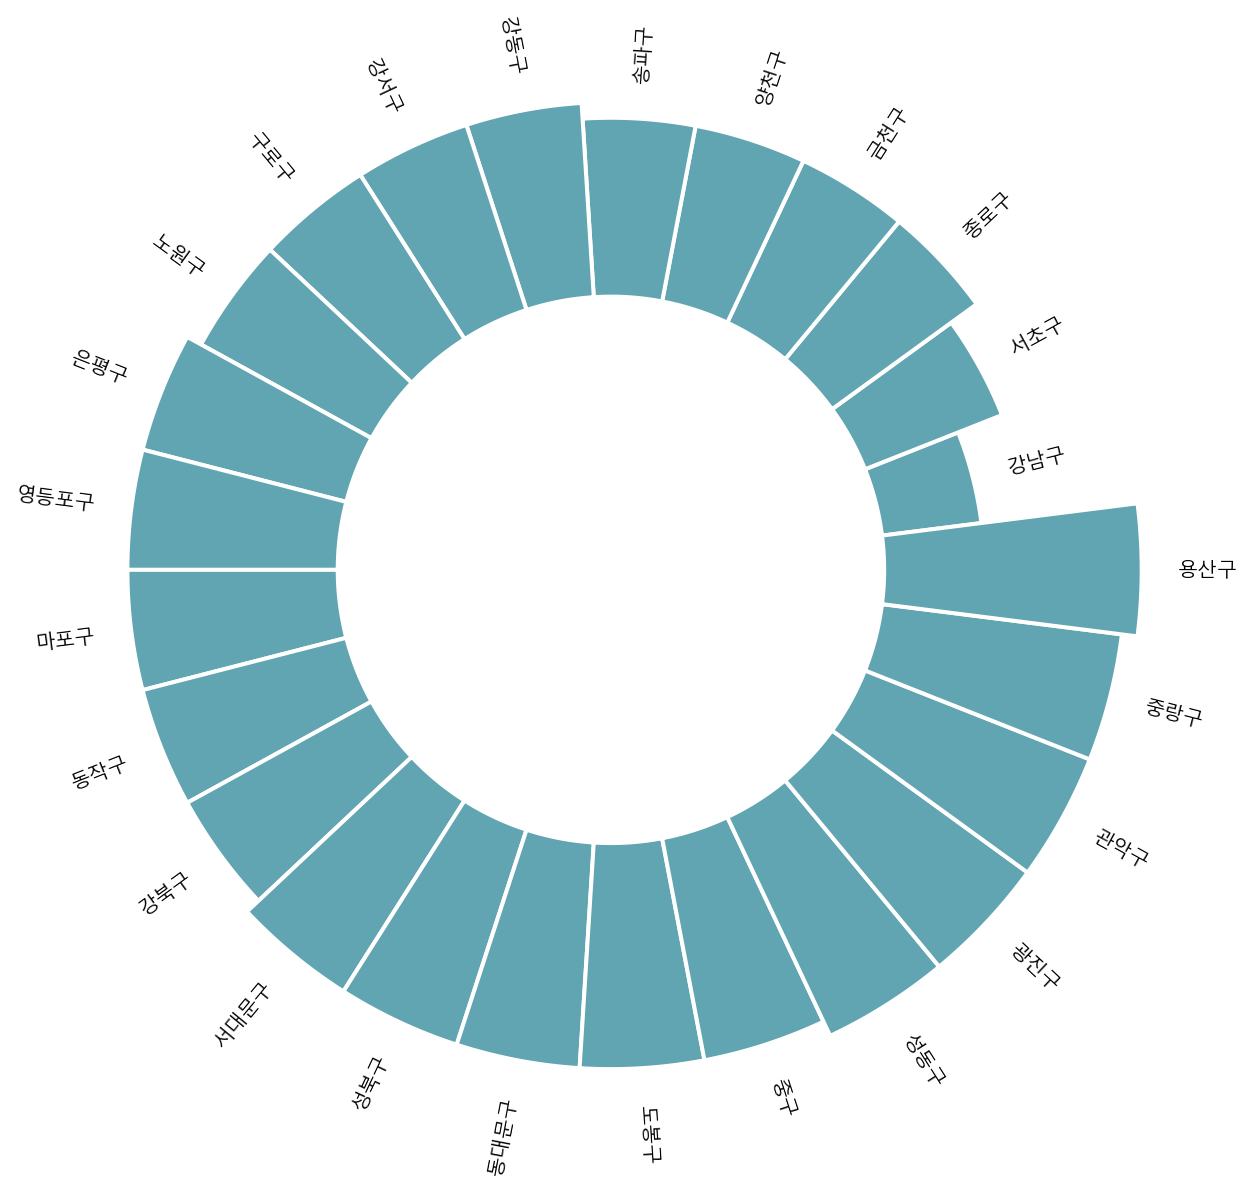

In [41]:
df = pd.DataFrame(
        {
            'Name': df_mac['구'],
            'Value': df_mac['매장수']
        })


# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor")

   

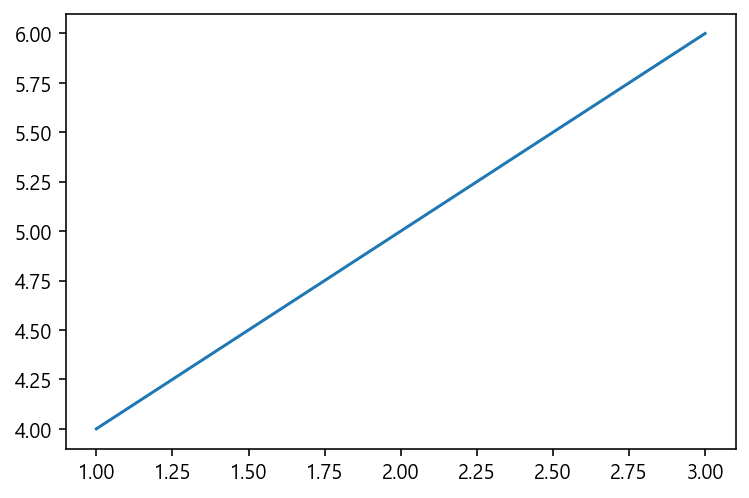

In [42]:
import json
import mpld3
import matplotlib.pyplot as plt

f = plt.figure()
plt.plot([1,2,3], [4,5,6])

#print(mpld3.fig_to_html(f, figid='THIS_IS_FIGID'))

In [43]:
df=pd.read_csv(r'D:\사용자\USER\Desktop\데이터\서울건강.csv', encoding='cp949', thousands=',')
#df.head()
odf = df.sort_values(by='평균',ascending=False) #내림차순
#odf.head()
odf = odf.reset_index(drop=True) #정렬한 후 인덱스가 뒤섞이므로 인덱스를 다시 초기화
print(odf['구군'][1])

서대문구


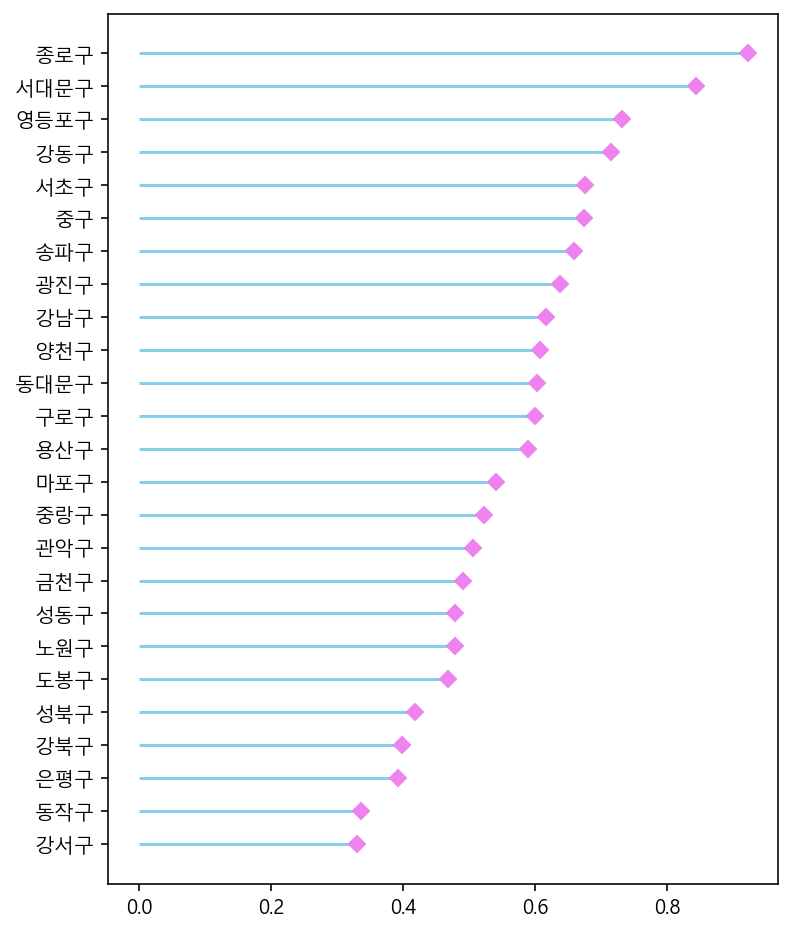

In [44]:
df=odf[odf["시도"].notnull() & df["시도"].str.contains("서울특별시")]
df = pd.DataFrame({'group':df['구군'], 'values':df['평균'] })
 
# Reorder it based on the values:
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)

f = plt.figure(figsize=(6,8))

# Make the plot
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='skyblue')
plt.plot(ordered_df['values'], my_range, "D",color="violet")
plt.yticks(my_range, ordered_df['group'])
plt.show()

#print(mpld3.fig_to_html(f, figid='THIS_IS_FIGID'))

In [45]:
df_mac = df_mac.assign(rank = range(1,26))
df = df.assign(rank2 = range(1,26))

In [46]:
df=df.rename(columns={'group':'구'})


In [47]:
df3=pd.merge(df_mac, df ,on="구") #################################dataframe 두개 합치기 
df3['total_rank']=(df3['rank']+df3['rank2'])/2
df3 = df3.sort_values(by='total_rank')
df3 = df3.reset_index(drop=True)
df3

,구,브랜드명,매장수,rank,values,rank2,total_rank
0,종로구,맥도날드,6,3,0.9220,1,2.0
1,서초구,맥도날드,8,2,0.6763,5,3.5
2,강남구,맥도날드,11,1,0.6171,9,5.0
3,강동구,맥도날드,5,7,0.7150,4,5.5
4,송파구,맥도날드,6,6,0.6596,7,6.5
5,양천구,맥도날드,6,5,0.6074,10,7.5
6,영등포구,맥도날드,4,12,0.7313,3,7.5
7,서대문구,맥도날드,3,16,0.8437,2,9.0
8,금천구,맥도날드,6,4,0.4905,17,10.5
9,구로구,맥도날드,5,9,0.5995,12,10.5


In [65]:
fitness=pd.read_csv(r'D:\사용자\USER\Desktop\데이터\전국헬스장.csv', encoding='cp949')
fitness = fitness[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('서울')]
fitness = fitness.drop(columns=['도로명전체주소','사업장명'], axis=1)
fitness['구']=''

In [66]:
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('종로구'),'구']='종로구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('중구'),'구']='중구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('용산구'),'구']='용산구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('성동구'),'구']='성동구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('광진구'),'구']='광진구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('동대문구'),'구']='동대문구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('중랑구'),'구']='중랑구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('성북구'),'구']='성북구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('강북구'),'구']='강북구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('도봉구'),'구']='도봉구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('노원구'),'구']='노원구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('은평구'),'구']='은평구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('서대문구'),'구']='서대문구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('마포구'),'구']='마포구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('양천구'),'구']='양천구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('구로구'),'구']='구로구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('금천구'),'구']='금천구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('영등포구'),'구']='영등포구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('동작구'),'구']='동작구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('관악구'),'구']='관악구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('서초구'),'구']='서초구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('강남구'),'구']='강남구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('송파구'),'구']='송파구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('강동구'),'구']='강동구'
fitness.loc[fitness['소재지전체주소'].notnull() &fitness['소재지전체주소'].str.contains('강서구'),'구']='강서구'

fitness

,소재지전체주소,구
180,서울특별시 광진구 구의동 203-7번지,광진구
181,서울특별시 광진구 자양동 663-21번지,광진구
182,서울특별시 광진구 중곡동 79-9번지 5층,광진구
183,서울특별시 광진구 구의동 214-6번지 강변리치타워 지하1층,광진구
184,서울특별시 광진구 중곡동 164-1번지 3층,광진구
...,...,...
10926,서울특별시 강남구 자곡동 56-115 훼미리타운,강남구
10927,서울특별시 서대문구 대현동 45-41,서대문구
10932,서울특별시 관악구 봉천동 1662-13 GTI 빌딩 지하1층,관악구
10938,서울특별시 광진구 자양동 584-5 지하1층,광진구


In [67]:
fitness=fitness.groupby('구')
fitness=fitness.count().reset_index()
fitness.columns = ['구','갯수']
fitness= fitness.sort_values(by='갯수',ascending=False)
fitness=fitness.reset_index()
fitness = fitness.drop(columns=['index'], axis=1)
fitness= fitness.drop(index=25, axis=0)
fitness

,구,갯수
0,강남구,380
1,서초구,223
2,송파구,209
3,강서구,173
4,영등포구,142
5,마포구,132
6,광진구,131
7,강동구,121
8,양천구,114
9,관악구,112


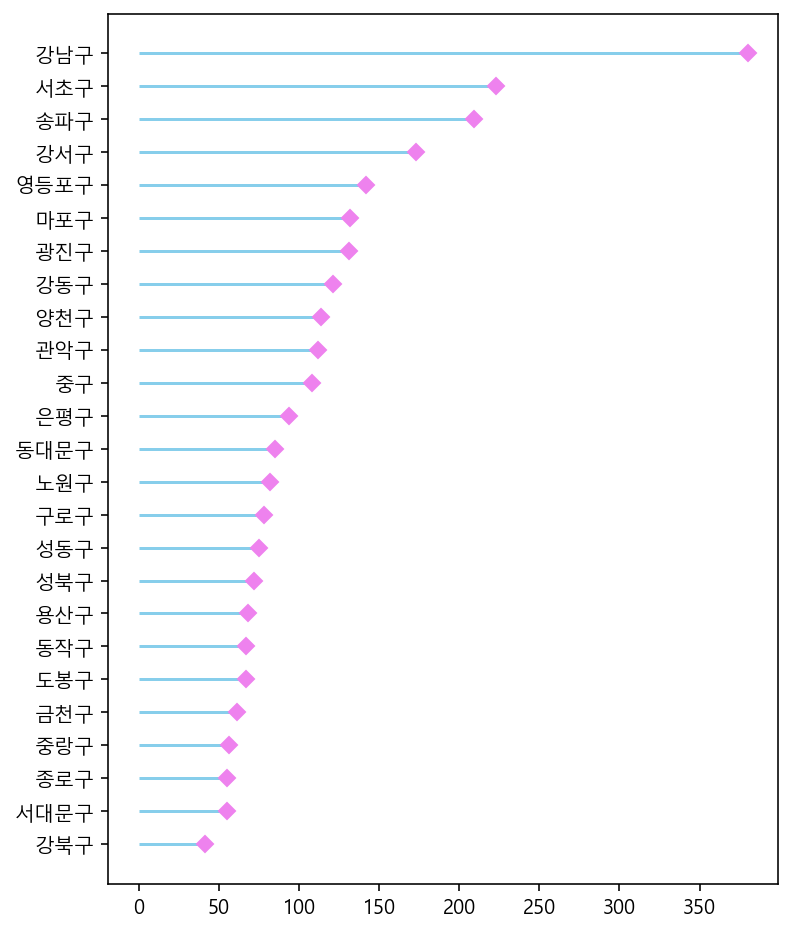

In [68]:
df=fitness
df = pd.DataFrame({'group':df['구'], 'values':df['갯수'] })
 
# Reorder it based on the values:
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)

f = plt.figure(figsize=(6,8))

# Make the plot
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='skyblue')
plt.plot(ordered_df['values'], my_range, "D",color="violet")
plt.yticks(my_range, ordered_df['group'])
plt.show()

#print(mpld3.fig_to_html(f, figid='THIS_IS_FIGID'))

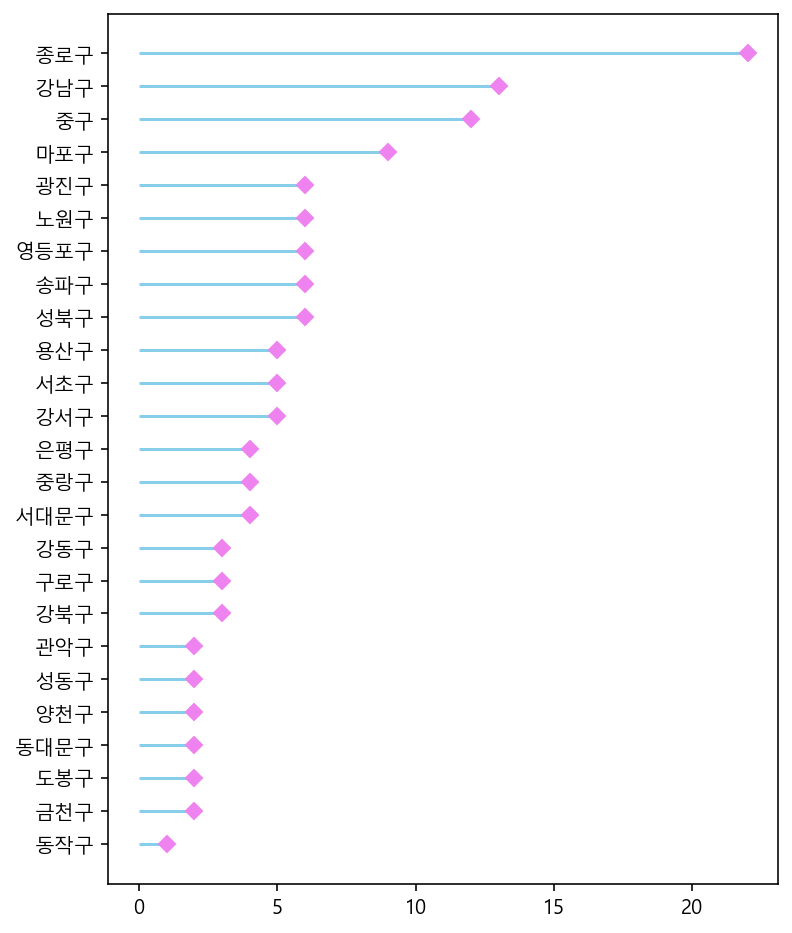

In [69]:
movie=pd.read_csv(r'D:\사용자\USER\Desktop\데이터\전국영화관.csv', encoding='cp949')
movie = movie[movie['지역'].notnull() &movie['지역'].str.contains('서울특별시')]
movie = movie.drop(columns=['극장이름', '종류','동','도로명'],axis=1)
movie=movie.groupby('시구')
movie=movie.count().reset_index()
movie.columns = ['구','갯수']
movie= movie.sort_values(by='갯수',ascending=False).reset_index()
movie = movie.drop(columns=['index'], axis=1)
movie

df=movie
df = pd.DataFrame({'group':df['구'], 'values':df['갯수'] })
 
# Reorder it based on the values:
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)

f = plt.figure(figsize=(6,8))

# Make the plot
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='skyblue')
plt.plot(ordered_df['values'], my_range, "D",color="violet")
plt.yticks(my_range, ordered_df['group'])
plt.show()

#print(mpld3.fig_to_html(f, figid='THIS_IS_FIGID'))

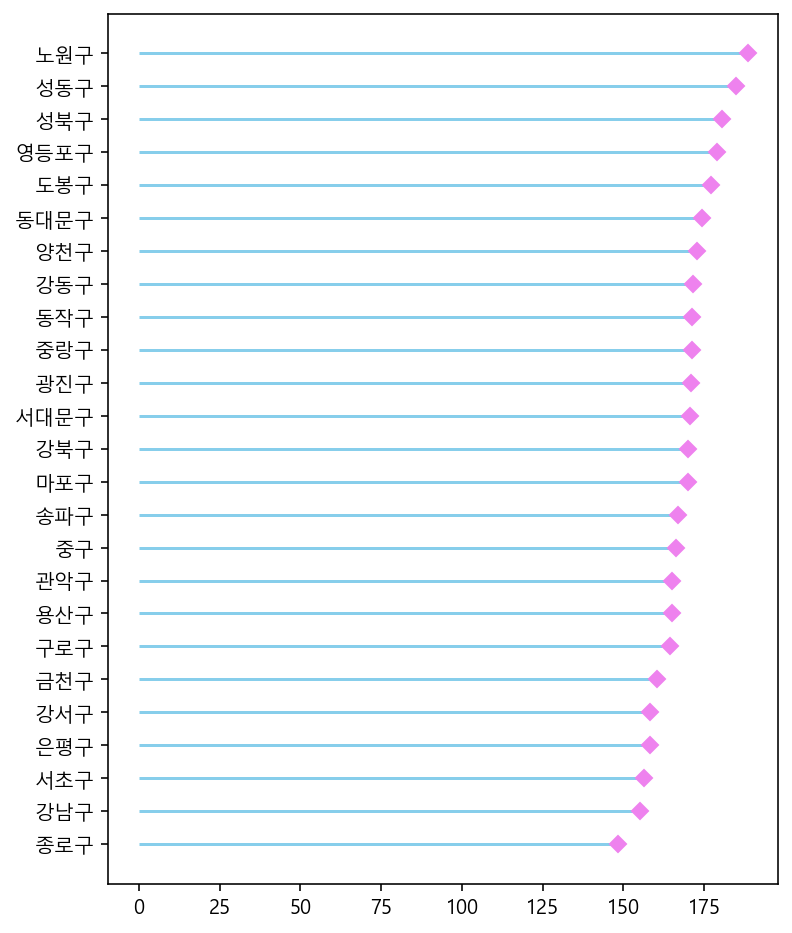

In [70]:
apart=pd.read_csv(r'D:\사용자\USER\Desktop\데이터\전국아파트.csv', encoding='cp949')
apart = apart[apart['시'].notnull() &apart['시'].str.contains('서울')]
apart = apart.drop(columns=['시'],axis=1)
apart.columns = ['구','가격']
apart= apart.sort_values(by='가격',ascending=False).reset_index()
apart = apart.drop(columns=['index'], axis=1)
apart

df=apart
df = pd.DataFrame({'group':df['구'], 'values':df['가격'] })
 
# Reorder it based on the values:
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)

f = plt.figure(figsize=(6,8))

# Make the plot
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='skyblue')
plt.plot(ordered_df['values'], my_range, "D",color="violet")
plt.yticks(my_range, ordered_df['group'])
plt.show()

#print(mpld3.fig_to_html(f, figid='THIS_IS_FIGID'))

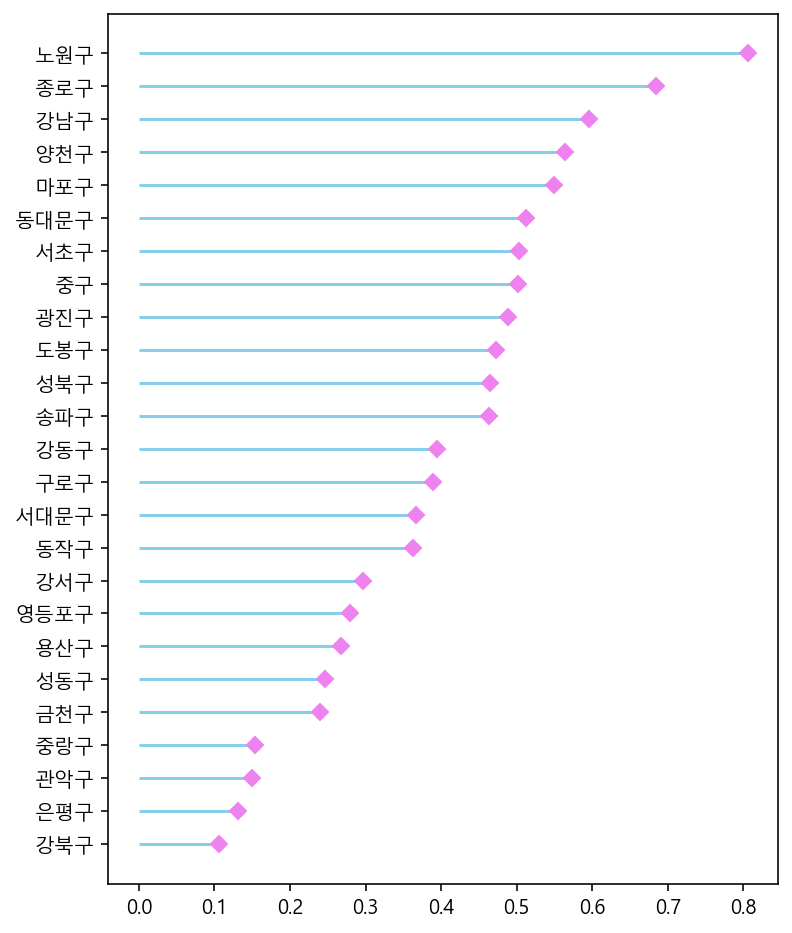

In [71]:
edu=pd.read_csv(r'D:\사용자\USER\Desktop\데이터\전국교육.csv', encoding='cp949')
edu = edu[edu['시도'].notnull() &edu['시도'].str.contains('서울특별시')]
edu = edu.drop(columns=['시도'],axis=1)
edu= edu.sort_values(by='평균',ascending=False).reset_index()
edu = edu.drop(columns=['index'], axis=1)
edu

df=edu
df = pd.DataFrame({'group':df['구군'], 'values':df['평균'] })
 
# Reorder it based on the values:
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)

f = plt.figure(figsize=(6,8))

# Make the plot
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='skyblue')
plt.plot(ordered_df['values'], my_range, "D",color="violet")
plt.yticks(my_range, ordered_df['group'])
plt.show()

#print(mpld3.fig_to_html(f, figid='THIS_IS_FIGID'))

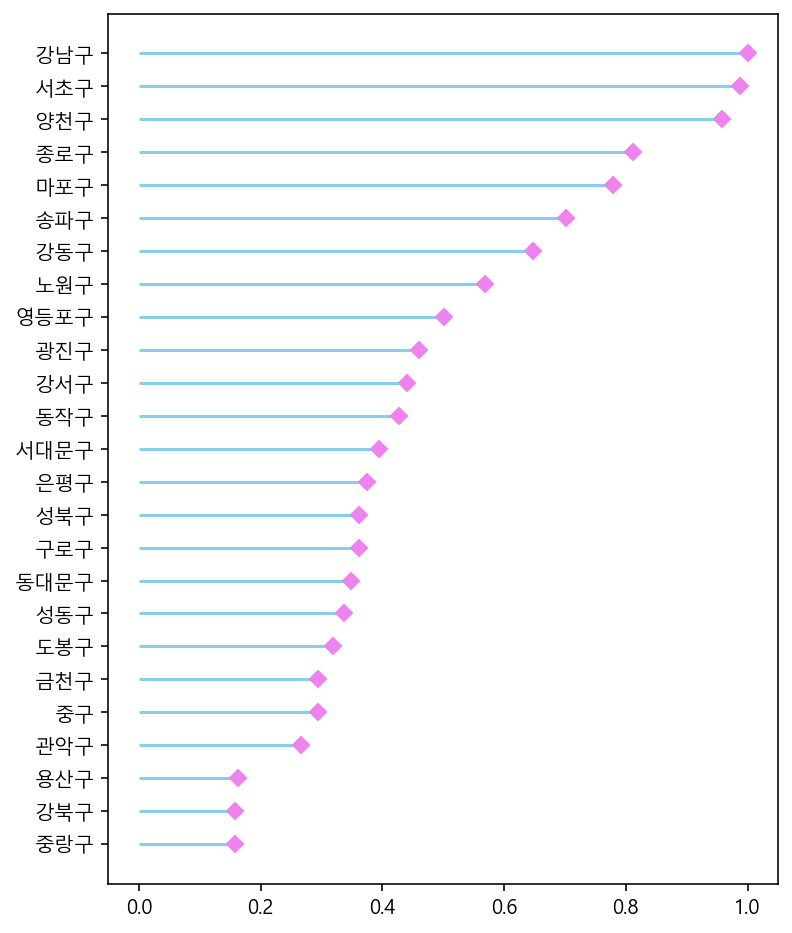

In [72]:
private_edu=pd.read_csv(r'D:\사용자\USER\Desktop\데이터\전국교육.csv', encoding='cp949')
private_edu = private_edu[private_edu['시도'].notnull() &private_edu['시도'].str.contains('서울특별시')]
private_edu = private_edu.drop(columns=['시도'],axis=1)
private_edu= private_edu.sort_values(by='인구 천명당 사설학원수',ascending=False).reset_index()
private_edu = private_edu.drop(columns=['index'], axis=1)
private_edu

df=private_edu
df = pd.DataFrame({'group':df['구군'], 'values':df['인구 천명당 사설학원수'] })
 
# Reorder it based on the values:
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)

f = plt.figure(figsize=(6,8))

# Make the plot
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='skyblue')
plt.plot(ordered_df['values'], my_range, "D",color="violet")
plt.yticks(my_range, ordered_df['group'])
plt.show()

#print(mpld3.fig_to_html(f, figid='THIS_IS_FIGID'))

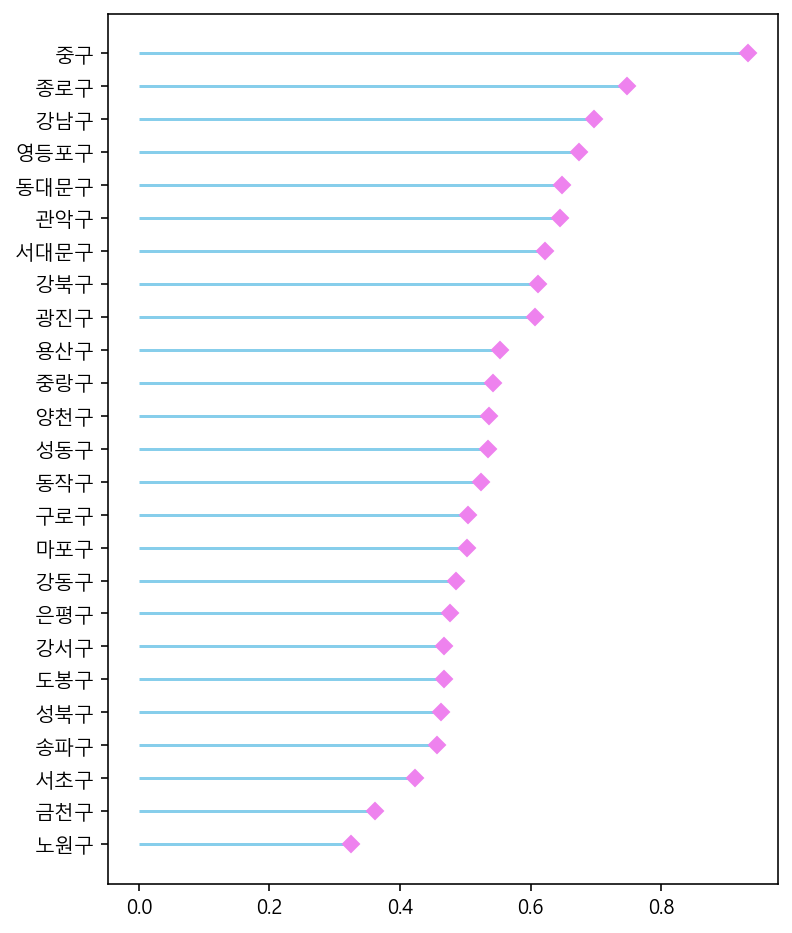

In [73]:
safe=pd.read_csv(r'D:\사용자\USER\Desktop\데이터\전국안전.csv', encoding='cp949')
safe = safe[safe['시도'].notnull() &safe['시도'].str.contains('서울특별시')]
safe = safe.drop(columns=['시도'],axis=1)
safe= safe.sort_values(by='평균',ascending=False).reset_index()
safe = safe.drop(columns=['index'], axis=1)
safe

df=safe
df = pd.DataFrame({'group':df['구군'], 'values':df['평균'] })
 
# Reorder it based on the values:
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)

f = plt.figure(figsize=(6,8))

# Make the plot
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='skyblue')
plt.plot(ordered_df['values'], my_range, "D",color="violet")
plt.yticks(my_range, ordered_df['group'])
plt.show()

#print(mpld3.fig_to_html(f, figid='THIS_IS_FIGID'))

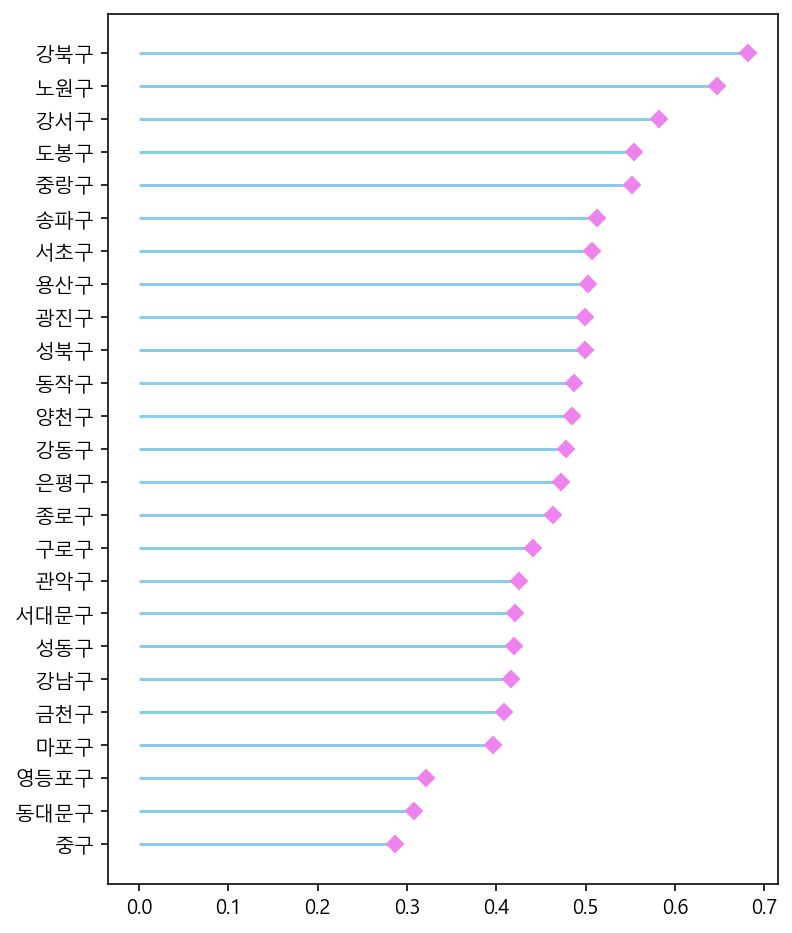

In [74]:
eco=pd.read_csv(r'D:\사용자\USER\Desktop\데이터\전국환경.csv', encoding='cp949')
eco = eco[eco['시도'].notnull() &eco['시도'].str.contains('서울특별시')]
eco = eco.drop(columns=['시도'],axis=1)
eco= eco.sort_values(by='평균',ascending=False).reset_index()
eco = eco.drop(columns=['index'], axis=1)
eco

df=eco
df = pd.DataFrame({'group':df['구군'], 'values':df['평균'] })
 
# Reorder it based on the values:
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)

f = plt.figure(figsize=(6,8))

# Make the plot
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='skyblue')
plt.plot(ordered_df['values'], my_range, "D",color="violet")
plt.yticks(my_range, ordered_df['group'])
plt.show()

#print(mpld3.fig_to_html(f, figid='THIS_IS_FIGID'))

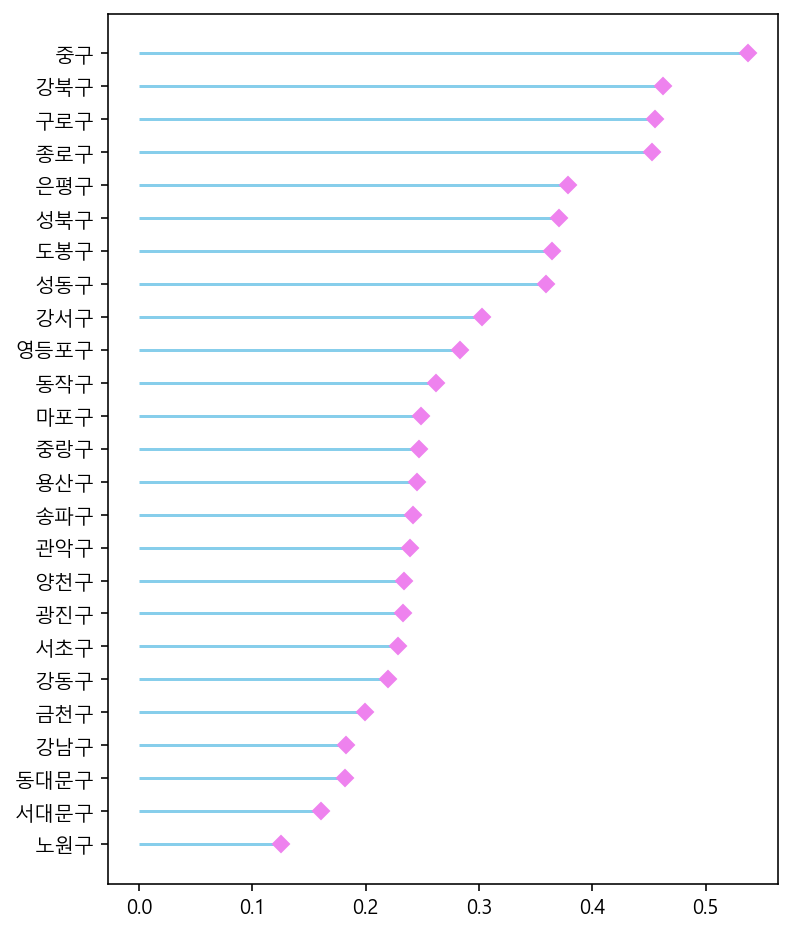

In [4]:
library=pd.read_csv(r'D:\사용자\USER\Desktop\데이터\전국여가.csv', encoding='cp949')
library = library[library['시도'].notnull() &library['시도'].str.contains('서울특별시')]
library = library.drop(columns=['시도'],axis=1)
library= library.sort_values(by='인구 십만명당 도서관수',ascending=False).reset_index()
library = library.drop(columns=['index'], axis=1)
library

df=library
df = pd.DataFrame({'group':df['구군'], 'values':df['인구 십만명당 도서관수'] })
 
# Reorder it based on the values:
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)

f = plt.figure(figsize=(6,8))

# Make the plot
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='skyblue')
plt.plot(ordered_df['values'], my_range, "D",color="violet")
plt.yticks(my_range, ordered_df['group'])


plt.show()

#print(mpld3.fig_to_html(f, figid='THIS_IS_FIGID'))